# iSketch

A empresa iSketch, localizada em São Paulo, farica e disponibiliza um software com foco no desenvolvimento 3D de projetos para construção civil, como forma de prototipagem de grandes projetos.

Para usar o software, o cliente precisa adquirir uma licença de uso que se renova anualmente.

Uma das estratégias de aquisição de clientes da iSketch é a captura do e-mail dos clientes em torca de uma Newsletter com conteúdos semanais sobre a construção civil. A assinatura da newsletter permite começar um relacionamento entre a iSketch e as pessoas, a fim de mostrar as vantagens de utilizar o software para criar protótipos de construções civis.

Portanto, a melhoria de conversão da página de captura de e-mail, ofertando a newsletter em troca, é crucial para o crescimento do número de clientes.

Sendo assim, o coordenador de Marketing da empresa pediu ao time de Designers que criassem uma nova página de captura de e-mail com uma pequena modificação nas cores do botão de "sign up", a fim de aumentar a conversão da página.

O time de Designers criaram uma página com o botão de "sig up" vermelho para ser testada contra a página atual que possui o botão azul. O coordenador de Marketing tem pressa em testar a nova página, pois a empresa vem adquirindo poucos clientes nas últimas semanas e isso pode comprometer o faturamento anual da empresa.

O time de Cientistas de Dados da iSketch foi acionado com a missão de testar a nova página de captura de e-mail o mais rápido possível. A primeira ideia foi plenejar um experimento de teste A/B entre as duas páginas por um período de 7 dias, para concluir a efetividade da mudança da cor do botão. Porém, o coordenador de Marketing categoricamente disse ao time de dados que não poderia esperar 7 dias e solicitou que concluíssem em menos tempo.

## 0.1 Imports

In [1]:
import pandas as pd

from IPython.display import Image

# Planejamento da Solução

**Input - Output - Tasks**

_Input_:
- Problema de negócio
- Dados passados

_Output_:
- E-mail

_Tasks_:
- Teste de Hipótese
- Definir o método de inferência estatística
- Design de Experimento
    - Hipóteses
    - Efeito esperado
    - Cálculo da probabilidade conjunta
    - Cálculo do risco esperado

# 1.0 Escolha do método

Devido a limitação de tempo e necessidade de rápido retorno.


O método para identificar um efeito dentre as variantes será: **A/B Bayesiano com Multi-Armed Bandit**

# 2.0 Design de Experimentos

## 2.1 Formulação das hipótese

Hipótese nula (H0): Não há diferença entre as variantes.

Hipótese alternativa (H1): Há uma diferença entre as variantes.

## 2.2 Parâmetros do experimento

Métrica de avaliação: **CTR (Click-Through Rate)**

    CTR = Total de Clicks no botão / Total de visitas na página
    

**A página atual apresenta conversão de 30%.**

**A página desafiante tem uma conversão prevista de 35%.**

# 3.0 Aplicação do Teste Bayesiano

Para aplicação do teste foram definidos duas abordagens:
- Teste A/B Bayesiano (estático)
- Teste A/B Bayesiano com Multi-Armed Bandit (dinâmico)

## 3.1 Teste A/B Bayesiano

Cada grupo (controle e tratamento) receberá diferentes páginas, e os resultados de clicks nos botões de cada página são contabilizados.
- Scripts disponíveis na pasta: /ab_bayesian

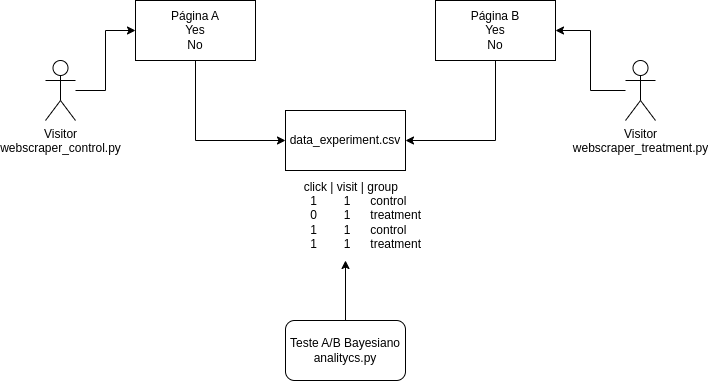

In [26]:
Image('img/fluxograma_teste_AB.png')

Através de inferência bayesiana, calcula-se as probabilidades do risco de cada página (qual a perda esperada na escolha da página) e a probabilidade da página B ser melhor do que A.

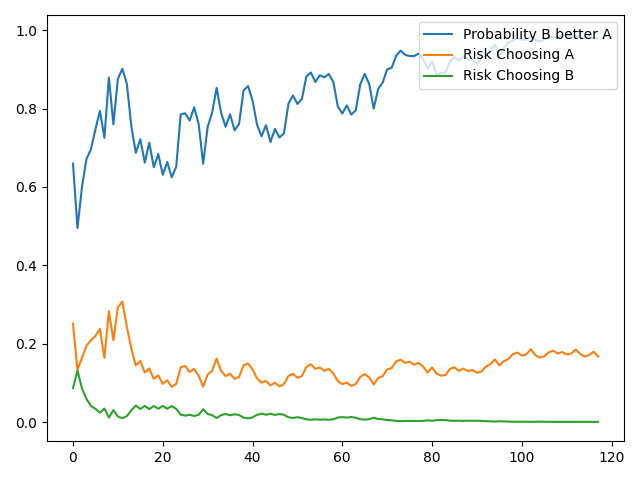

In [29]:
Image('img/ab_bayesian.png')

Entre 70 e 80 visitas, a página B já tem mais de **80% de probabilidade de ser melhor que A**.

Com risco próximo de zero, enquanto a página A estabiliza com risco por volta de 20%.

## 3.2 Teste A/B Bayesiano com MAB

Aplicando agentes de Multi-Armed Bandit com Inferência Bayesiana, não há divisão entre grupos de controle e tratamento, as diferentes páginas são exibidas baseadas nas probabilidades determinadas com base os dados passados.
- Scripts disponíveis na pasta: /ab_bayesian_mab

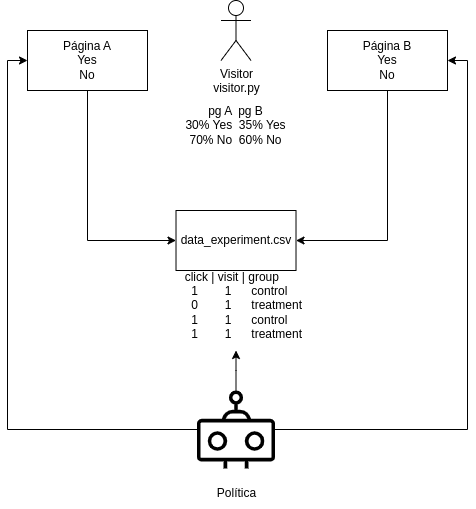

In [28]:
Image('img/fluxograma_mab_AB.png')

Recalculando a probabilidade e riscos de cada página.

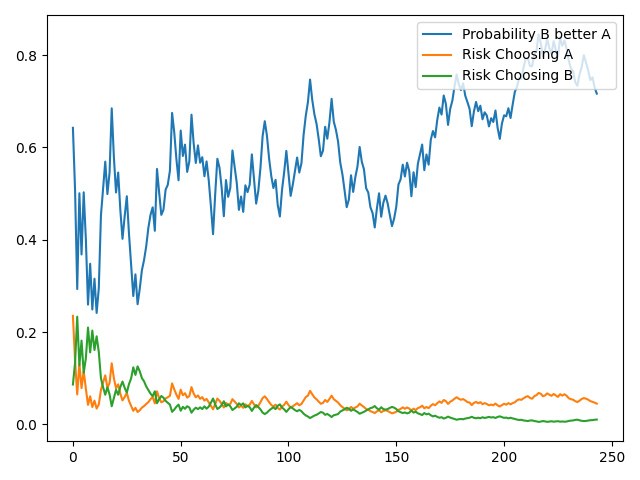

In [30]:
Image('img/mab_bayesian.png')

Como o Multi-Armed Bandit pode variar a exibição das páginas converse os resultados passados, foi necessário um número maior de iterações para a probabilidade de B ser melhor que A ultrapassar 80%.

# 4.0 Analisando a conversão

In [2]:
# load datasets for each experiment
bayesian_dataset = pd.read_csv('ab_bayesian/data_experiment.csv')

mab_dataset = pd.read_csv('ab_bayesian_mab/data_experiment.csv')

Considerando 80 iterações (período que o testes estático ultrapassa 80% de probabilidade):

In [5]:
bayesian_dataset[:80].groupby('group').sum()

,click,visit
group,,
control,8,42
treatment,12,38


In [6]:
mab_dataset[:80].groupby('group').sum()

,click,visit
group,,
control,14,44
treatment,11,36


Com 80 iterações o MAB ainda não identificou o tratamento como sendo melhor, mas nota-se que por não dividir em grupos e exibir as páginas conforme seu critério de probabilidade, há 25% mais conversão.

In [29]:
bayesian_dataset['click'].mean()

0.28859060402684567

In [30]:
mab_dataset['click'].mean()

0.3442622950819672

Considerando as taxas de conversão para todo o período de cada teste, o modelo MAB apresenta taxa 19,3%  superior.

O MAB apresenta maior variação das probabilidades até estabilização, mas reduz a perda de conversão.